<a href="https://colab.research.google.com/github/Kamala0910/Rans-det-ml/blob/main/ML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries (if not already installed)
!pip install torch torchvision pandas matplotlib scikit-learn


In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Step 2: Load the Dataset
# Make sure your dataset is in the correct path or upload it to Colab using 'Upload' option
df = pd.read_csv('/content/archive (2).zip')

# Step 3: Basic Exploration
# Display first 5 rows of dataset to understand structure
print("First 5 rows of the dataset:")
display(df.head())


First 5 rows of the dataset:


,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll,79755c51e413ed3c6be4635fd729a6e1,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
1,05c8318f98a5d301d80000009c316005.vertdll.dll,95e19f3657d34a432eada93221b0ea16,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
2,06054fba-5619-4a86-a861-ffb0464bef5d.dll,85c32641d77a54e19ba8ea4ab305c791,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
3,075822ac99a5d301660400009c316005.adhapi.dll,62e3b959d982ef534b66f819fe15f085,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,090607dd9ba5d301ca0900009c316005.SensorsNative...,ae38c5f7d313ad0ff3bfb8826476767f,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1


In [ ]:
df.describe()

,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
count,62485.000000,6.248500e+04,6.248500e+04,62485.000000,62485.000000,6.248500e+04,6.248500e+04,6.248500e+04,62485.000000,62485.000000,62485.000000,6.248500e+04,62485.000000,6.248500e+04,62485.000000,62485.000000
mean,6756.472657,2.587048e+04,1.541611e+05,58.785997,5.417524,8.953186e+05,4.094623e+05,1.466311e+05,9.782604,6.613171,4.751172,8.759830e+05,12966.031400,1.844664e+05,0.018004,0.433992
std,13345.499919,6.461396e+06,1.903142e+06,1114.068244,2.543697,3.779527e+07,2.851820e+07,1.124630e+06,9.047157,16.976465,2.138584,6.288189e+05,15762.725511,1.732625e+07,0.132968,0.495628
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,332.000000,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000e+00,0.000000e+00,4.096000e+03,6.000000,0.000000,3.000000,2.621440e+05,0.000000,1.080000e+03,0.000000,0.000000
50%,332.000000,0.000000e+00,0.000000e+00,0.000000,5.000000,0.000000e+00,0.000000e+00,8.520000e+03,9.000000,0.000000,5.000000,1.048576e+06,320.000000,2.496000e+03,0.000000,0.000000
75%,332.000000,2.800000e+01,1.283200e+04,6.000000,6.000000,2.875200e+04,1.040000e+02,6.553600e+04,11.000000,10.000000,6.000000,1.048576e+06,32768.000000,2.350400e+04,0.000000,1.000000
max,43620.000000,1.615155e+09,2.852127e+08,63325.000000,260.000000,2.147484e+09,2.415919e+09,6.615450e+07,255.000000,255.000000,33.000000,1.677722e+07,58632.000000,4.294942e+09,1.000000,1.000000


In [ ]:
# Check for missing values
print("Missing values in each column:")
print('null data:',df.isnull().sum())


Missing values in each column:
null data: FileName              0
md5Hash               0
Machine               0
DebugSize             0
DebugRVA              0
MajorImageVersion     0
MajorOSVersion        0
ExportRVA             0
ExportSize            0
IatVRA                0
MajorLinkerVersion    0
MinorLinkerVersion    0
NumberOfSections      0
SizeOfStackReserve    0
DllCharacteristics    0
ResourceSize          0
BitcoinAddresses      0
Benign                0
dtype: int64


In [ ]:
# Get basic information about data types and number of entries
print("Dataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62485 entries, 0 to 62484
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FileName            62485 non-null  object
 1   md5Hash             62485 non-null  object
 2   Machine             62485 non-null  int64 
 3   DebugSize           62485 non-null  int64 
 4   DebugRVA            62485 non-null  int64 
 5   MajorImageVersion   62485 non-null  int64 
 6   MajorOSVersion      62485 non-null  int64 
 7   ExportRVA           62485 non-null  int64 
 8   ExportSize          62485 non-null  int64 
 9   IatVRA              62485 non-null  int64 
 10  MajorLinkerVersion  62485 non-null  int64 
 11  MinorLinkerVersion  62485 non-null  int64 
 12  NumberOfSections    62485 non-null  int64 
 13  SizeOfStackReserve  62485 non-null  int64 
 14  DllCharacteristics  62485 non-null  int64 
 15  ResourceSize        62485 non-null  int64 
 16  B

In [ ]:
# Summary statistics for numerical columns
print("Summary Statistics:")
display(df.describe())



Summary Statistics:


,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
count,62485.000000,6.248500e+04,6.248500e+04,62485.000000,62485.000000,6.248500e+04,6.248500e+04,6.248500e+04,62485.000000,62485.000000,62485.000000,6.248500e+04,62485.000000,6.248500e+04,62485.000000,62485.000000
mean,6756.472657,2.587048e+04,1.541611e+05,58.785997,5.417524,8.953186e+05,4.094623e+05,1.466311e+05,9.782604,6.613171,4.751172,8.759830e+05,12966.031400,1.844664e+05,0.018004,0.433992
std,13345.499919,6.461396e+06,1.903142e+06,1114.068244,2.543697,3.779527e+07,2.851820e+07,1.124630e+06,9.047157,16.976465,2.138584,6.288189e+05,15762.725511,1.732625e+07,0.132968,0.495628
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,332.000000,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000e+00,0.000000e+00,4.096000e+03,6.000000,0.000000,3.000000,2.621440e+05,0.000000,1.080000e+03,0.000000,0.000000
50%,332.000000,0.000000e+00,0.000000e+00,0.000000,5.000000,0.000000e+00,0.000000e+00,8.520000e+03,9.000000,0.000000,5.000000,1.048576e+06,320.000000,2.496000e+03,0.000000,0.000000
75%,332.000000,2.800000e+01,1.283200e+04,6.000000,6.000000,2.875200e+04,1.040000e+02,6.553600e+04,11.000000,10.000000,6.000000,1.048576e+06,32768.000000,2.350400e+04,0.000000,1.000000
max,43620.000000,1.615155e+09,2.852127e+08,63325.000000,260.000000,2.147484e+09,2.415919e+09,6.615450e+07,255.000000,255.000000,33.000000,1.677722e+07,58632.000000,4.294942e+09,1.000000,1.000000


In [ ]:
df = pd.get_dummies(df, columns=['Machine'], drop_first=True)


In [ ]:

# Drop non-numeric columns (e.g., 'FileName', 'md5Hash', 'Machine')
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Feature Scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)  # Only numeric data is scaled

# Convert scaled data back into a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df_numeric.columns)

# Add the target column 'Benign' back to the scaled data
df_scaled['Benign'] = df['Benign']


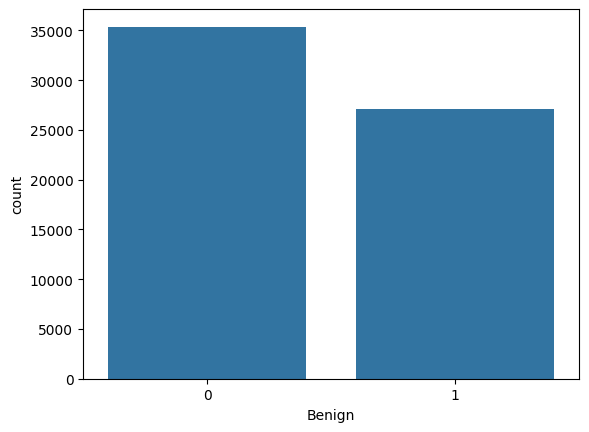

In [ ]:
# Visualize class distribution
sns.countplot(x='Benign', data=df)
plt.show()


In [ ]:
# Check correlation with the target
correlation_matrix = df_numeric.corr()  # Numeric columns only
display(correlation_matrix['Benign'])




,Benign
DebugSize,-0.003500
DebugRVA,0.072781
MajorImageVersion,0.049603
MajorOSVersion,0.398076
ExportRVA,-0.012547
ExportSize,-0.012457
IatVRA,0.084622
MajorLinkerVersion,0.296925
MinorLinkerVersion,-0.111294
NumberOfSections,-0.020433


In [ ]:
from scipy.stats import chi2_contingency
contingency = pd.crosstab(df['md5Hash'], df['Benign'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi-squared test p-value for 'md5Hash' column: {p}")


Chi-squared test p-value for 'md5Hash' column: 0.4981191406995388


In [ ]:
df = df.drop(['FileName', 'md5Hash'], axis=1)


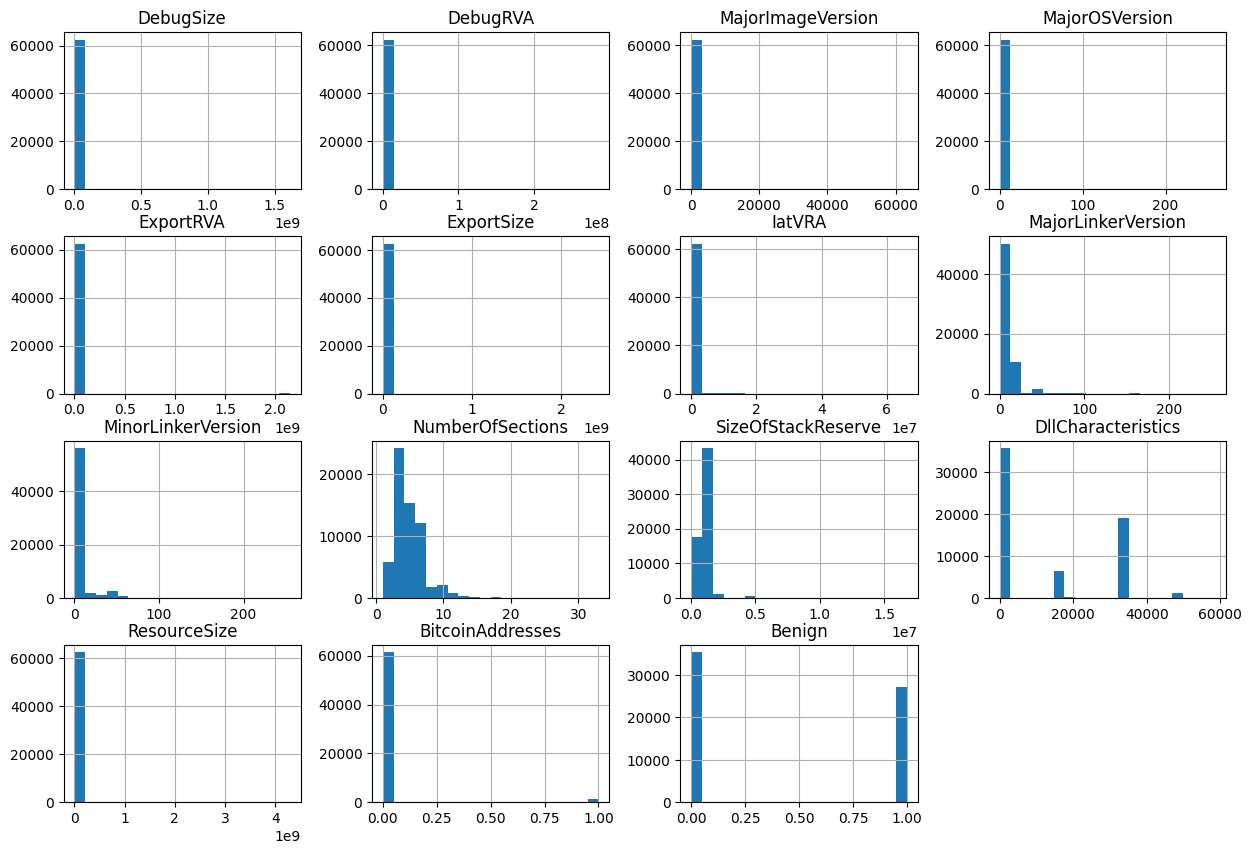

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Plot histograms for all numeric columns
df_numeric.hist(figsize=(15, 10), bins=20)
plt.show()


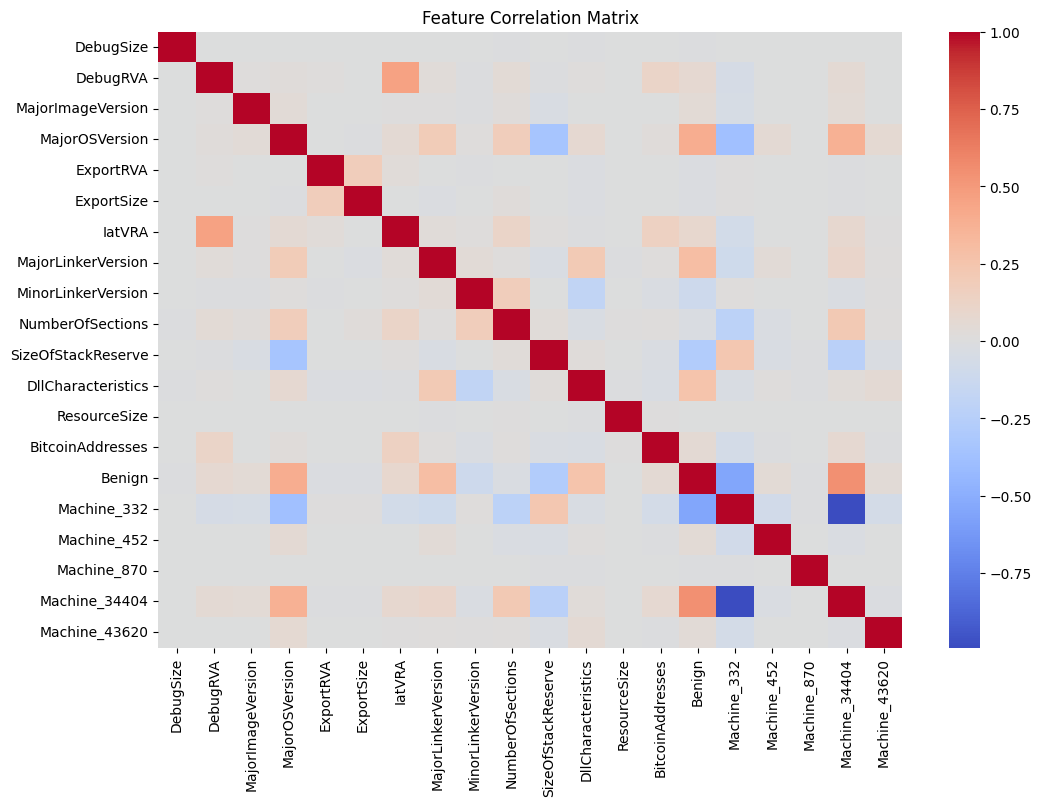

In [ ]:
# Correlation matrix
plt.figure(figsize=(12,8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

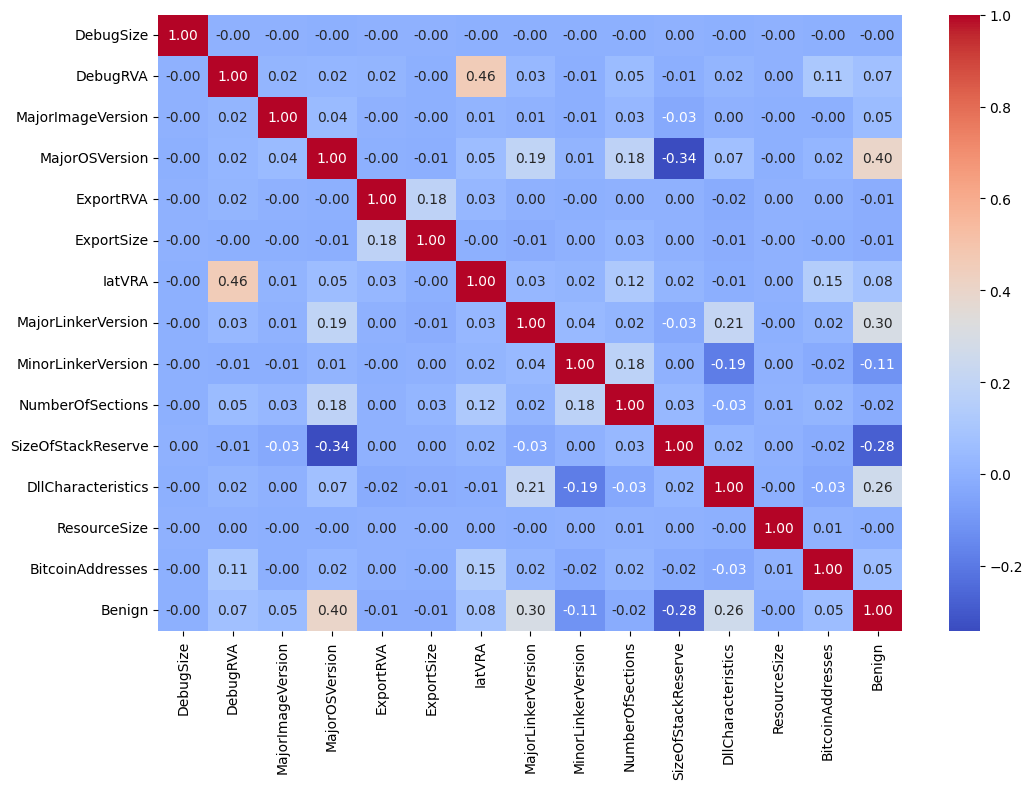

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


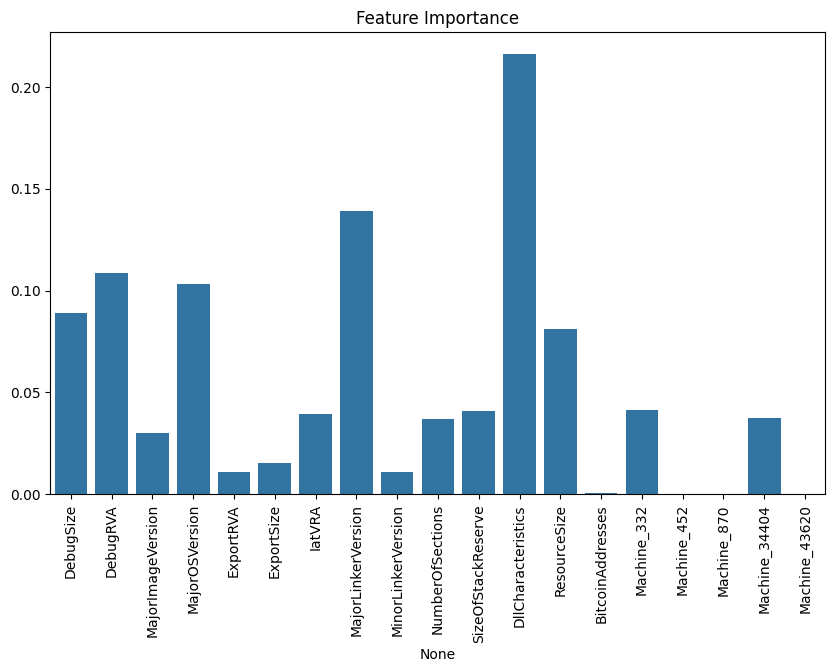

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Feature importance using Random Forest
X = df.drop('Benign', axis=1)  # Features
y = df['Benign']  # Target

rf = RandomForestClassifier()
rf.fit(X, y)

# Plot feature importance
feature_importances = rf.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=X.columns, y=feature_importances)
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Separate features and target
X = df.drop('Benign', axis=1)
y = df['Benign']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Reshape for CNN input
X_train_tensor = X_train_tensor.unsqueeze(1)
X_test_tensor = X_test_tensor.unsqueeze(1)


In [ ]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv1d(1, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool1d(2)
        self.fc1 = nn.Linear(32 * (X_train_tensor.shape[2] // 2), 64)  # Adjust input size
        self.fc2 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = x.view(-1, 32 * (X_train_tensor.shape[2] // 2))  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

# Instantiate the model
model = CNNModel()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)



In [ ]:
training_loss = []
validation_loss = []
num_epochs = 50
batch_size = 32

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs.squeeze(), y_train_tensor)
    loss.backward()
    optimizer.step()
    training_loss.append(loss.item())

    # Validation loss
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_tensor)
        val_loss = criterion(val_outputs.squeeze(), y_test_tensor)
        validation_loss.append(val_loss.item())

    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')


Epoch [1/50], Training Loss: 0.6861, Validation Loss: 0.6657
Epoch [2/50], Training Loss: 0.6658, Validation Loss: 0.6477
Epoch [3/50], Training Loss: 0.6479, Validation Loss: 0.6316
Epoch [4/50], Training Loss: 0.6320, Validation Loss: 0.6160
Epoch [5/50], Training Loss: 0.6165, Validation Loss: 0.6055
Epoch [6/50], Training Loss: 0.6017, Validation Loss: 0.5907
Epoch [7/50], Training Loss: 0.5871, Validation Loss: 0.5757
Epoch [8/50], Training Loss: 0.5723, Validation Loss: 0.5607
Epoch [9/50], Training Loss: 0.5594, Validation Loss: 0.5460
Epoch [10/50], Training Loss: 0.5468, Validation Loss: 0.5317
Epoch [11/50], Training Loss: 0.5345, Validation Loss: 0.5176
Epoch [12/50], Training Loss: 0.5203, Validation Loss: 0.5039
Epoch [13/50], Training Loss: 0.5067, Validation Loss: 0.4907
Epoch [14/50], Training Loss: 0.4936, Validation Loss: 0.4783
Epoch [15/50], Training Loss: 0.4850, Validation Loss: 0.4664
Epoch [16/50], Training Loss: 0.4730, Validation Loss: 0.4551
Epoch [17/50], Tr

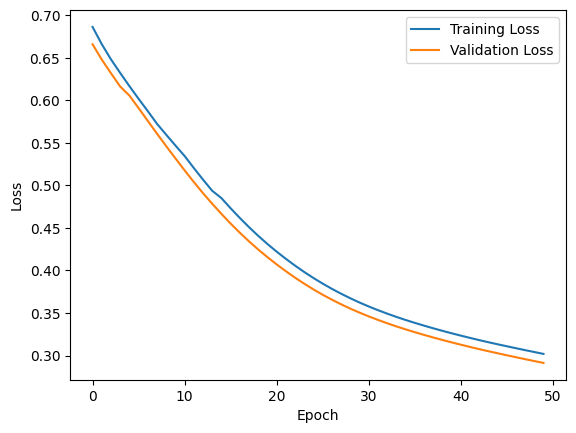

In [ ]:

# Plot training and validation loss
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Accuracy: 0.8751733703190014
Confusion Matrix:
 [[10072   606]
 [ 1734  6334]]


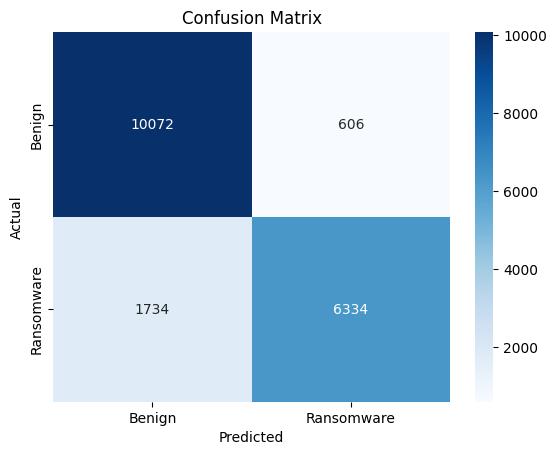

In [ ]:
# Prediction and Evaluation on Test Data
model.eval()
from sklearn.metrics import accuracy_score, confusion_matrix
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    predictions = (test_outputs.squeeze() > 0.5).float()  # Threshold for binary classification

# Convert predictions to numpy for evaluation
y_pred = predictions.numpy()
y_true = y_test_tensor.numpy()

# Accuracy and Confusion Matrix
accuracy = accuracy_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Benign', 'Ransomware'], yticklabels=['Benign', 'Ransomware'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Precision: 0.9127
Recall: 0.7851
F1 Score: 0.8441


Epoch [1/50], Loss: 1.0006
Epoch [2/50], Loss: 0.9844
Epoch [3/50], Loss: 0.9692
Epoch [4/50], Loss: 0.9544
Epoch [5/50], Loss: 0.9397
Epoch [6/50], Loss: 0.9249
Epoch [7/50], Loss: 0.9095
Epoch [8/50], Loss: 0.8934
Epoch [9/50], Loss: 0.8766
Epoch [10/50], Loss: 0.8593
Epoch [11/50], Loss: 0.8415
Epoch [12/50], Loss: 0.8234
Epoch [13/50], Loss: 0.8050
Epoch [14/50], Loss: 0.7864
Epoch [15/50], Loss: 0.7674
Epoch [16/50], Loss: 0.7479
Epoch [17/50], Loss: 0.7278
Epoch [18/50], Loss: 0.7071
Epoch [19/50], Loss: 0.6857
Epoch [20/50], Loss: 0.6639
Epoch [21/50], Loss: 0.6418
Epoch [22/50], Loss: 0.6196
Epoch [23/50], Loss: 0.5974
Epoch [24/50], Loss: 0.5752
Epoch [25/50], Loss: 0.5531
Epoch [26/50], Loss: 0.5312
Epoch [27/50], Loss: 0.5095
Epoch [28/50], Loss: 0.4880
Epoch [29/50], Loss: 0.4667
Epoch [30/50], Loss: 0.4456
Epoch [31/50], Loss: 0.4247
Epoch [32/50], Loss: 0.4041
Epoch [33/50], Loss: 0.3837
Epoch [34/50], Loss: 0.3637
Epoch [35/50], Loss: 0.3441
Epoch [36/50], Loss: 0.3251
E

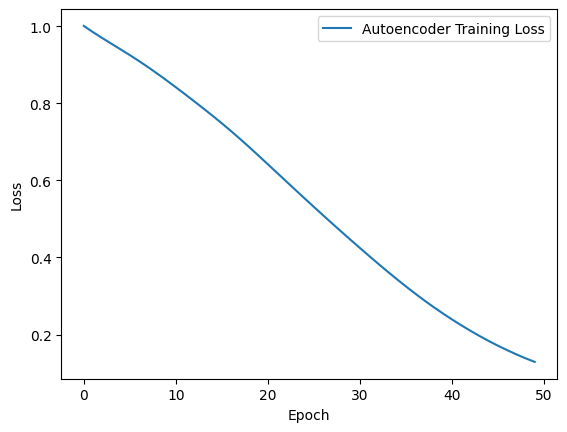

In [ ]:
# Correct data for Autoencoder
X_train_tensor_ae = torch.tensor(X_train, dtype=torch.float32)  # Original shape
X_test_tensor_ae = torch.tensor(X_test, dtype=torch.float32)

# Define Autoencoder class with dynamic input size
class Autoencoder(nn.Module):
    def __init__(self, input_size):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64)
        )
        self.decoder = nn.Sequential(
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, input_size)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Initialize the Autoencoder
input_size = X_train_tensor_ae.shape[1]
autoencoder = Autoencoder(input_size)

# Loss and optimizer
criterion_ae = nn.MSELoss()
optimizer_ae = optim.Adam(autoencoder.parameters(), lr=0.001)

# Training the Autoencoder
num_epochs = 50
batch_size = 32
autoencoder_training_loss = []

for epoch in range(num_epochs):
    autoencoder.train()
    optimizer_ae.zero_grad()
    outputs = autoencoder(X_train_tensor_ae)
    loss = criterion_ae(outputs, X_train_tensor_ae)
    loss.backward()
    optimizer_ae.step()
    autoencoder_training_loss.append(loss.item())

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Plot training loss
plt.plot(autoencoder_training_loss, label="Autoencoder Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()



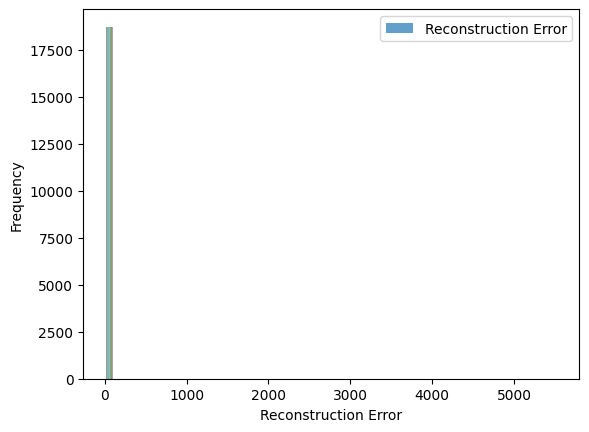

Number of Anomalies Detected: 17809


In [ ]:
# Compute Reconstruction Error on Test Data
autoencoder.eval()
with torch.no_grad():
    reconstructed = autoencoder(X_test_tensor)
    reconstruction_error = torch.mean((reconstructed - X_test_tensor) ** 2, dim=1).numpy()

# Visualize Reconstruction Error
plt.hist(reconstruction_error, bins=50, alpha=0.7, label='Reconstruction Error')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Set a threshold for anomaly detection
threshold = np.percentile(reconstruction_error, 95)  # Adjust percentile as needed
anomalies = reconstruction_error > threshold
print(f"Number of Anomalies Detected: {np.sum(anomalies)}")


In [ ]:
!pip install streamlit pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 90.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.0 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import torch
import joblib

# Load the model
cnn_model = torch.load('cnn_model.pth')
cnn_model.eval()

st.title("Ransomware Detection Dashboard")
uploaded_file = st.file_uploader("Upload Log File", type="csv")

if uploaded_file:
    log_data = pd.read_csv(uploaded_file)
    log_tensor = torch.tensor(log_data.values, dtype=torch.float32).unsqueeze(1)

    with torch.no_grad():
        predictions = cnn_model(log_tensor).squeeze()
        st.write("Predictions:", predictions.numpy())



Writing app.py


In [ ]:
!streamlit run app.py





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.48.39.125:8501



In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Connect to SQLite database
conn = sqlite3.connect('ransomware_db.db')
cursor = conn.cursor()

st.title("Ransomware Detection Dashboard")

# Display prediction results
st.header("Recent Ransomware Predictions")
query = "SELECT * FROM ransomware_predictions ORDER BY timestamp DESC LIMIT 50"
predictions = pd.read_sql(query, conn)
st.write(predictions)

# Display model performance metrics
st.header("Model Performance Metrics")
y_true = predictions["actual_label"]  # Replace with the actual label column in your table
y_pred = predictions["prediction"]    # Replace with the prediction column

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

st.write(f"Precision: {precision:.4f}")
st.write(f"Recall: {recall:.4f}")
st.write(f"F1 Score: {f1:.4f}")

# Visualization: Prediction Confidence Over Time
st.header("Prediction Confidence Over Time")
fig, ax = plt.subplots()
predictions["confidence"].plot(ax=ax)  # Replace with actual confidence column if available
ax.set_xlabel("Timestamp")
ax.set_ylabel("Confidence")
st.pyplot(fig)


In [ ]:
from pyngrok import ngrok
import subprocess

# Insert your ngrok authtoken here
!ngrok config add-authtoken 2ocxEAn88cvAqT8GGJ0zBEdRuhv_4yUbH3EwyX9UwVZj3BDyB



Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:

import time

# Start the Streamlit app in the background
!streamlit run app.py &

# Wait for a few seconds to ensure Streamlit starts
time.sleep(5)

# Open an ngrok tunnel on port 8501
public_url = ngrok.connect(port="8501")
print("Streamlit app is live at:", public_url)





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.90.27.106:8501

